# Objective 2: Recommendation
#### Bryan Bo Cao
Github: https://github.com/BryanBo-Cao/data-science/tree/master/music-box/src/
## Recommendation On Playtime and Playpercent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
schema_play = ['uid','device','song_id','song_type','song_name','singer','play_time','song_length','paid_flag']
df_play = pd.read_csv('../data/play/20170331_1_play.log',delimiter='\t',header=None,index_col=None,names=schema_play)

/Users/GundamOO/anaconda/envs/gl-env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_play.head()

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag
0,167584071.0,ar,4.38999e+06,0.0,魔幻手机,伤感歌曲,0,0.0,0.0
1,168029752.0,ar,1.02636e+06,0.0,你在天边,容中尔甲,0,277.0,0.0
2,167584071.0,ar,503175,0.0,奇迹再现(电视剧《迪加奥特曼》主题曲),毛毛,0,0.0,0.0
3,168029752.0,ar,234903,0.0,梦中的达娃卓玛,容中尔甲,0,315.0,0.0
4,167965547.0,ar,6.60614e+06,0.0,心锁,杨小曼&冷漠,256,256.0,0.0


In [4]:
df_play.describe()

,uid,song_type,song_length,paid_flag
count,1.860168e+06,1.858873e+06,1.859603e+06,1.859670e+06
mean,1.447586e+08,1.422830e-01,3.598380e+02,4.427667e-03
std,5.519367e+07,7.243009e-01,1.069461e+04,1.333122e+00
min,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,1.676101e+08,0.000000e+00,1.800000e+02,0.000000e+00
50%,1.677840e+08,0.000000e+00,2.340000e+02,0.000000e+00
75%,1.679364e+08,0.000000e+00,2.740000e+02,0.000000e+00
max,1.687785e+08,1.980000e+02,3.103254e+06,4.300000e+02


In [5]:
df_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860666 entries, 0 to 1860665
Data columns (total 9 columns):
uid            float64
device         object
song_id        object
song_type      float64
song_name      object
singer         object
play_time      object
song_length    float64
paid_flag      float64
dtypes: float64(4), object(5)
memory usage: 127.8+ MB


In [6]:
song_type_cnts = df_play.song_type.value_counts()
song_type_cnts.head(10)

0.0     1631080
1.0      208354
2.0       18585
3.0         356
40.0         51
30.0         42
34.0         27
39.0         26
31.0         23
33.0         23
Name: song_type, dtype: int64

# Visualize data

In [7]:
song_type_indexes = song_type_cnts.index.values
song_type_indexes = song_type_indexes.tolist()

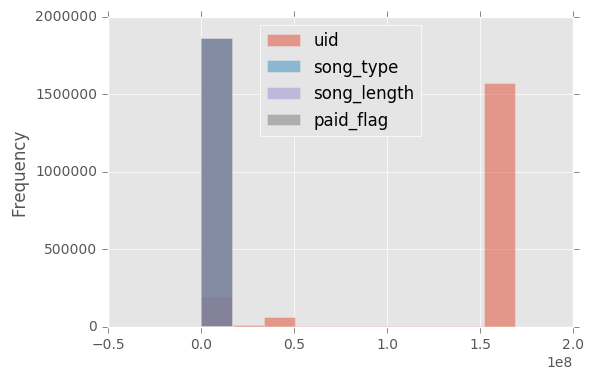

In [8]:
df_play.plot.hist(alpha=0.5)

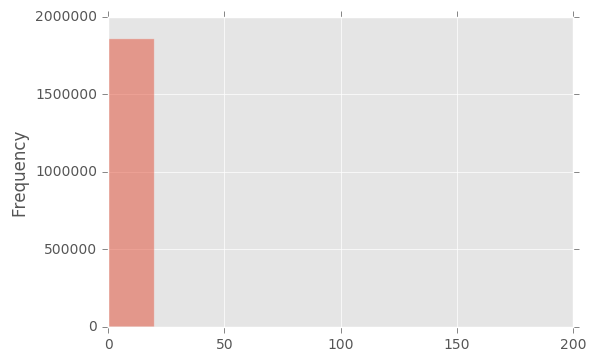

In [9]:
df_play.song_type.plot.hist(alpha=0.5)

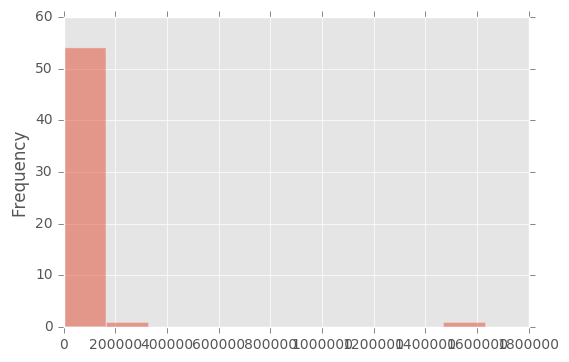

In [10]:
df_play.song_type.value_counts().plot.hist(alpha=0.5)

Apply log to df_play.song_type.value_counts()

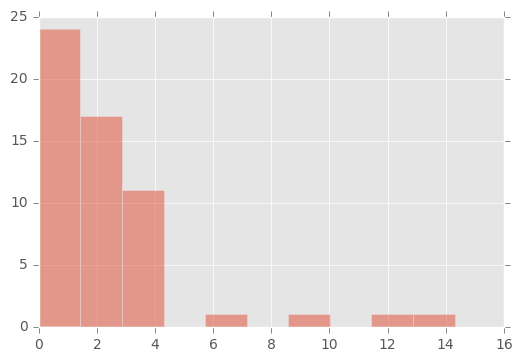

In [11]:
df_play.song_type.value_counts().apply(np.log).hist(alpha=0.5)
plt.show()

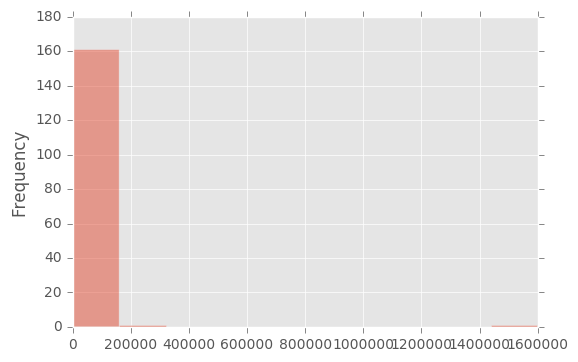

In [12]:
df_play.device.value_counts().plot.hist(alpha=0.5)

Apply log to df_play.device.value_counts()

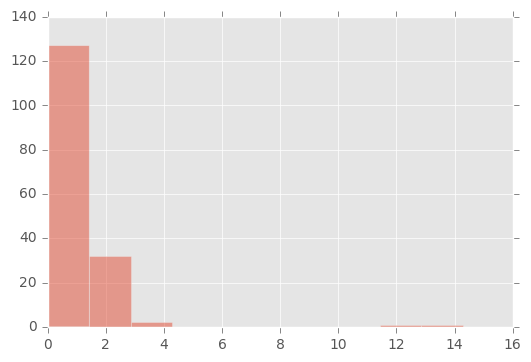

In [13]:
df_play.device.value_counts().apply(np.log).hist(alpha=0.5)
plt.show()

## Create training set and test set

In [14]:
from sklearn.cross_validation import train_test_split
df_play_train, df_play_test = train_test_split(
                    df_play, test_size = 0.2, random_state = 64)

/Users/GundamOO/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
df_play_train.head(10)

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag
1250689,167583820.0,ar,1169064,0.0,你把爱情给了谁,龙梅子,236,236.0,0.0
1270101,168031866.0,ip,6414906,0.0,See You Again,Wiz Khalifa&Charlie Puth,229,229.0,0.0
624718,168008911.0,ip,6.05468e+06,0.0,小跳蛙铃声,网络歌手,33,33.0,0.0
900605,168009013.0,ip,107471,0.0,天路,韩红,9,262.0,0.0
12580,167797461.0,ar,6.29429e+06,0.0,可惜没如果,林俊杰,214,215.0,0.0
971594,167724122.0,ar,170121,0.0,花儿为什么这样红,韦唯,248,249.0,0.0
1515555,736305.0,ar,6.44431e+06,0.0,佛陀的爱,柯佩磊,203,224.0,0.0
1380788,1685126.0,ar,3.57778e+06,0.0,小宝贝快快睡,香香,240,241.0,0.0
1223216,167736304.0,ar,2.83881e+06,0.0,长安长安,梁博,124,124.0,0.0
168065,167741878.0,ar,226130,0.0,恭喜发财,卓依婷,201,202.0,0.0


# Item-item based recommender

In [16]:
# Reference: https://turi.com/products/create/docs/generated/graphlab.recommender.item_similarity_recommender.ItemSimilarityRecommender.html
import graphlab
# recommend based on song_type
df_for_rec_on_song_type = df_play[['uid', 'song_id', 'song_type']]
df_for_rec_on_song_type.head(10)

,uid,song_id,song_type
0,167584071.0,4.38999e+06,0.0
1,168029752.0,1.02636e+06,0.0
2,167584071.0,503175,0.0
3,168029752.0,234903,0.0
4,167965547.0,6.60614e+06,0.0
5,167584071.0,6.22274e+06,0.0
6,168029752.0,1.02636e+06,0.0
7,167584071.0,5.01111e+06,0.0
8,168029752.0,234901,0.0
9,167923831.0,1.37506e+07,0.0


In [17]:
df_for_rec_on_song_type.shape

(1860666, 3)

### User

In [18]:
df_for_rec_on_song_type_user_cnt = df_for_rec_on_song_type['uid'].value_counts()
df_for_rec_on_song_type_user_cnt.head()

1685126.0     64249
37025504.0    46406
736305.0      43789
751824.0      30986
1791497.0     26869
Name: uid, dtype: int64

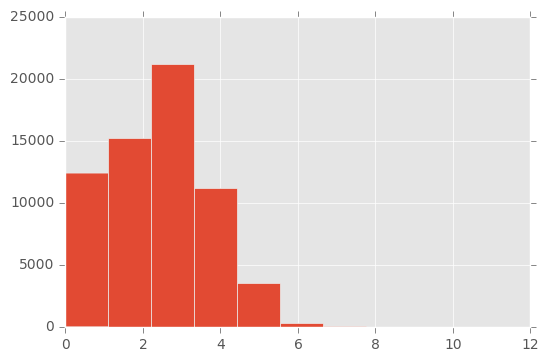

In [19]:
df_for_rec_on_song_type_user_cnt.apply(np.log).hist()
plt.show()

### Song

In [20]:
df_for_rec_on_song_type_song_cnt = df_for_rec_on_song_type['song_id'].value_counts()
df_for_rec_on_song_type_song_cnt.head()

0.0           134418
0              22820
9950164.0      12415
15249349.0      9393
5237384.0       5932
Name: song_id, dtype: int64

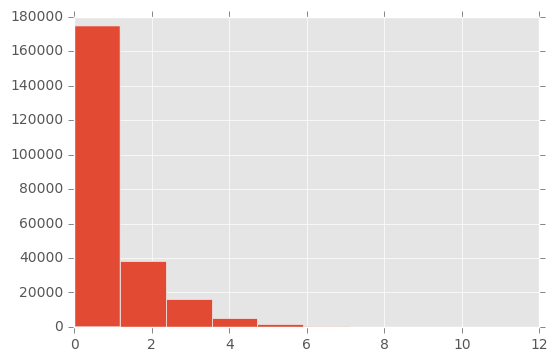

In [21]:
df_for_rec_on_song_type_song_cnt.apply(np.log).hist()
plt.show()

### Fill na with 0 

In [22]:
df_play.fillna(0, inplace=True)

In [23]:
df_play['play_time'].fillna(0, inplace=True)

## Clean column type

In [24]:
df_play['uid'] = df_play['uid'].astype(str)
df_play['device'] = df_play['device'].astype(str)
df_play['song_id'] = df_play['song_id'].astype(str)
df_play['song_name'] = df_play['song_name'].astype(str)
df_play['singer'] = df_play['singer'].astype(str)
df_play['play_time'] = pd.to_numeric(df_play['play_time'], errors='coerce')
#df_play['play_time'] = df_play['play_time'].astype(int)
df_play['song_length'] = df_play['song_length'].astype(float)
df_play['paid_flag'] = df_play['paid_flag'].astype(float)

## Recommend songs based on play_time

In [25]:
df_play.head(10)

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag
0,167584071.0,ar,4389991.0,0.0,魔幻手机,伤感歌曲,0.0,0.0,0.0
1,168029752.0,ar,1026364.0,0.0,你在天边,容中尔甲,0.0,277.0,0.0
2,167584071.0,ar,503175.0,0.0,奇迹再现(电视剧《迪加奥特曼》主题曲),毛毛,0.0,0.0,0.0
3,168029752.0,ar,234903.0,0.0,梦中的达娃卓玛,容中尔甲,0.0,315.0,0.0
4,167965547.0,ar,6606144.0,0.0,心锁,杨小曼&冷漠,256.0,256.0,0.0
5,167584071.0,ar,6222735.0,0.0,铠甲勇士刑天主题曲,儿童歌曲,0.0,0.0,0.0
6,168029752.0,ar,1026363.0,0.0,喜马拉雅恋曲,容中尔甲,0.0,266.0,0.0
7,167584071.0,ar,5011107.0,0.0,穿越曙光,唐丹,0.0,0.0,0.0
8,168029752.0,ar,234901.0,0.0,九寨之子,容中尔甲,245.0,245.0,0.0
9,167923831.0,ip,13750591.0,0.0,悟空 - Live,戴荃,197.0,197.0,0.0


In [26]:
df_play_cnt = df_play.count()
df_play_cnt

uid            1860666
device         1860666
song_id        1860666
song_type      1860666
song_name      1860666
singer         1860666
play_time      1849407
song_length    1860666
paid_flag      1860666
dtype: int64

Clean data, fiter out records whose song_length is non-positive and play_time is greater than song_length.

In [27]:
df_play_clean = df_play[df_play['song_length'] > 0]
df_play_clean = df_play_clean[df_play_clean['play_time'] <= df_play_clean['song_length']]
df_play_clean

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag
1,168029752.0,ar,1026364.0,0.0,你在天边,容中尔甲,0.0,277.0,0.0
3,168029752.0,ar,234903.0,0.0,梦中的达娃卓玛,容中尔甲,0.0,315.0,0.0
4,167965547.0,ar,6606144.0,0.0,心锁,杨小曼&冷漠,256.0,256.0,0.0
6,168029752.0,ar,1026363.0,0.0,喜马拉雅恋曲,容中尔甲,0.0,266.0,0.0
8,168029752.0,ar,234901.0,0.0,九寨之子,容中尔甲,245.0,245.0,0.0
9,167923831.0,ip,13750591.0,0.0,悟空 - Live,戴荃,197.0,197.0,0.0
12,168029752.0,ar,1026359.0,0.0,珠穆朗玛峰,容中尔甲,0.0,244.0,0.0
13,167807475.0,ar,348243.0,0.0,Cursed Destiny(C7 Meets Technorocker Radio Mix),mabra,24.0,190.0,0.0
14,167900247.0,ar,13667778.0,0.0,Pina Colada Boy,Baby Alice,55.0,184.0,0.0
15,167958001.0,ar,6266032.0,0.0,赤裸离开,孙露,0.0,242.0,0.0


In [28]:
df_play_clean_cnt = df_play_clean.count()
df_play_clean_cnt

uid            1557499
device         1557499
song_id        1557499
song_type      1557499
song_name      1557499
singer         1557499
play_time      1557499
song_length    1557499
paid_flag      1557499
dtype: int64

In [29]:
df_play_cnt - df_play_clean_cnt

uid            303167
device         303167
song_id        303167
song_type      303167
song_name      303167
singer         303167
play_time      291908
song_length    303167
paid_flag      303167
dtype: int64

In [30]:
sf_play_for_rec_on_play_time = graphlab.SFrame(df_play_clean)
sf_play_for_rec_on_play_time.head()

This non-commercial license of GraphLab Create for academic use is assigned to bo.cao-1@colorado.edu and will expire on May 24, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1531083262.log


uid,device,song_id,song_type,song_name,singer,play_time,song_length
168029752.0,ar,1026364.0,0.0,你在天边,容中尔甲,0.0,277.0
168029752.0,ar,234903.0,0.0,梦中的达娃卓玛,容中尔甲,0.0,315.0
167965547.0,ar,6606144.0,0.0,心锁,杨小曼&冷漠,256.0,256.0
168029752.0,ar,1026363.0,0.0,喜马拉雅恋曲,容中尔甲,0.0,266.0
168029752.0,ar,234901.0,0.0,九寨之子,容中尔甲,245.0,245.0
167923831.0,ip,13750591.0,0.0,悟空 - Live,戴荃,197.0,197.0
168029752.0,ar,1026359.0,0.0,珠穆朗玛峰,容中尔甲,0.0,244.0
167807475.0,ar,348243.0,0.0,Cursed Destiny(C7 MeetsTechnorocker Radio Mix) ...,mabra,24.0,190.0
167900247.0,ar,13667778.0,0.0,Pina Colada Boy,Baby Alice,55.0,184.0
167958001.0,ar,6266032.0,0.0,赤裸离开,孙露,0.0,242.0


In [31]:
item_item_rec_on_play_time = graphlab.recommender.item_similarity_recommender.create(
    sf_play_for_rec_on_play_time,
    user_id = 'uid',
    item_id = 'song_id',
    target = 'play_time'
)

Recsys training: model = item_similarity

Warning: Ignoring columns device, song_type, song_name, singer, song_length, paid_flag;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1557499 observations with 60830 users and 205798 items.

Data prepared in: 1.43827s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.004ms                        | 3.25       |

| 32.324ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing the 32 most common items by brute force search.

Transposing user-item lists for use in nearest neighbor search.

+------------------------------------+------------+

| Elapsed Time (Data Transposition)) | % Complete |

+------------------------------------+------------+

| 12.783ms                           | 0          |

| 227.551ms                          | 100        |

+------------------------------------+------------+

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 462.666ms                           | 0                | 0               |

+-------------------------------------+------------------+-----------------+

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.46s                               | 24.75            | 51127           |

| 2.46s                               | 39.5             | 81665           |

| 3.46s                               | 41.5             | 85849           |

| 4.46s                               | 42.5             | 87464           |

| 5.46s                               | 47               | 97173           |

| 6.47s                               | 49.25            | 101464          |

| 7.47s                               | 51               | 105178          |

| 8.47s                               | 51.25            | 105650          |

| 9.46s                               | 68.25            | 140886          |

| 10.46s                              | 69               | 142054          |

| 11.48s                              | 69.75            | 144008          |

| 13.55s                              | 71.75            | 147862          |

| 15.13s                              | 97               | 199662          |

| 16.13s                              | 99.75            | 205765          |

| 18.69s                              | 100              | 205798          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 19.9048s

In [32]:
item_item_rec_on_play_time.summary()

Class                            : ItemSimilarityRecommender

Schema
------
User ID                          : uid
Item ID                          : song_id
Target                           : play_time
Additional observation features  : 0
User side features               : []
Item side features               : []

Statistics
----------
Number of observations           : 1557499
Number of users                  : 60830
Number of items                  : 205798

Training summary
----------------
Training time                    : 19.9049

Model Parameters
----------------
Model class                      : ItemSimilarityRecommender
threshold                        : 0.001
similarity_type                  : jaccard
training_method                  : auto

Other Settings
--------------
degree_approximation_threshold   : 4096
sparse_density_estimation_sample_size : 4096
max_data_passes                  : 4096
target_memory_usage              : 8589934592
seed_item_set_size               : 

In [33]:
item_item_rec_on_play_time.get_similar_items()

song_id,similar,score,rank
1026364.0,234903.0,1.0,1
1026364.0,1026363.0,1.0,2
1026364.0,1026363,1.0,3
1026364.0,1026359.0,1.0,4
1026364.0,234903,1.0,5
1026364.0,1026369.0,1.0,6
1026364.0,1026365.0,1.0,7
1026364.0,4582304.0,1.0,8
1026364.0,215921.0,1.0,9
1026364.0,234901,0.5,10


In [34]:
item_item_rec_on_play_time.recommend()

recommendations finished on 1000/60830 queries. users per second: 666.175

recommendations finished on 2000/60830 queries. users per second: 694.383

recommendations finished on 3000/60830 queries. users per second: 664.119

recommendations finished on 4000/60830 queries. users per second: 599.855

recommendations finished on 5000/60830 queries. users per second: 568

recommendations finished on 6000/60830 queries. users per second: 501.461

recommendations finished on 7000/60830 queries. users per second: 450.228

recommendations finished on 8000/60830 queries. users per second: 437.118

recommendations finished on 9000/60830 queries. users per second: 436.753

recommendations finished on 10000/60830 queries. users per second: 434.941

recommendations finished on 11000/60830 queries. users per second: 433.727

recommendations finished on 12000/60830 queries. users per second: 438.407

recommendations finished on 13000/60830 queries. users per second: 442.259

recommendations finished on 14000/60830 queries. users per second: 445.815

recommendations finished on 15000/60830 queries. users per second: 446.936

recommendations finished on 16000/60830 queries. users per second: 445.833

recommendations finished on 17000/60830 queries. users per second: 444.722

recommendations finished on 18000/60830 queries. users per second: 445.778

recommendations finished on 19000/60830 queries. users per second: 448.59

recommendations finished on 20000/60830 queries. users per second: 448.514

recommendations finished on 21000/60830 queries. users per second: 454.021

recommendations finished on 22000/60830 queries. users per second: 458.192

recommendations finished on 23000/60830 queries. users per second: 460.111

recommendations finished on 24000/60830 queries. users per second: 457.155

recommendations finished on 25000/60830 queries. users per second: 456.677

recommendations finished on 26000/60830 queries. users per second: 457.101

recommendations finished on 27000/60830 queries. users per second: 456.882

recommendations finished on 28000/60830 queries. users per second: 455.789

recommendations finished on 29000/60830 queries. users per second: 455.011

recommendations finished on 30000/60830 queries. users per second: 454.053

recommendations finished on 31000/60830 queries. users per second: 453.967

recommendations finished on 32000/60830 queries. users per second: 453.976

recommendations finished on 33000/60830 queries. users per second: 453.999

recommendations finished on 34000/60830 queries. users per second: 453.379

recommendations finished on 35000/60830 queries. users per second: 448.478

recommendations finished on 36000/60830 queries. users per second: 441.585

recommendations finished on 37000/60830 queries. users per second: 435.042

recommendations finished on 38000/60830 queries. users per second: 432.434

recommendations finished on 39000/60830 queries. users per second: 429.982

recommendations finished on 40000/60830 queries. users per second: 430.568

recommendations finished on 41000/60830 queries. users per second: 429.925

recommendations finished on 42000/60830 queries. users per second: 428.418

recommendations finished on 43000/60830 queries. users per second: 426.717

recommendations finished on 44000/60830 queries. users per second: 424.983

recommendations finished on 45000/60830 queries. users per second: 424.456

recommendations finished on 46000/60830 queries. users per second: 424.6

recommendations finished on 47000/60830 queries. users per second: 424.95

recommendations finished on 48000/60830 queries. users per second: 422.523

recommendations finished on 49000/60830 queries. users per second: 421.707

recommendations finished on 50000/60830 queries. users per second: 418.777

recommendations finished on 51000/60830 queries. users per second: 416.838

recommendations finished on 52000/60830 queries. users per second: 416.503

recommendations finished on 53000/60830 queries. users per second: 414.287

recommendations finished on 54000/60830 queries. users per second: 412.741

recommendations finished on 55000/60830 queries. users per second: 411.691

recommendations finished on 56000/60830 queries. users per second: 410.32

recommendations finished on 57000/60830 queries. users per second: 408.432

recommendations finished on 58000/60830 queries. users per second: 406.01

recommendations finished on 59000/60830 queries. users per second: 403.788

recommendations finished on 60000/60830 queries. users per second: 399.683

uid,song_id,score,rank
168029752.0,509369.0,0.0692783303039,1
168029752.0,507512.0,0.0549969589987,2
168029752.0,4398523.0,0.0549969589987,3
168029752.0,1080078.0,0.0503708151884,4
168029752.0,4842459.0,0.0447043859681,5
168029752.0,22857490.0,0.0378795806752,6
168029752.0,5057301.0,0.0366555909778,7
168029752.0,12567883.0,0.0366555909778,8
168029752.0,5023221.0,0.0366555909778,9
168029752.0,558684.0,0.0364341070486,10


## Define new rating -- play_percent
Playpercent = play_time / song_length
Clean data, fiter out records whose song_length is non-positive and play_time is greater than song_length.time / song_length

In [35]:
df_play_clean = df_play[df_play['song_length'] > 0]
df_play_clean = df_play_clean[df_play_clean['play_time'] <= df_play_clean['song_length']]
df_play_clean

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag
1,168029752.0,ar,1026364.0,0.0,你在天边,容中尔甲,0.0,277.0,0.0
3,168029752.0,ar,234903.0,0.0,梦中的达娃卓玛,容中尔甲,0.0,315.0,0.0
4,167965547.0,ar,6606144.0,0.0,心锁,杨小曼&冷漠,256.0,256.0,0.0
6,168029752.0,ar,1026363.0,0.0,喜马拉雅恋曲,容中尔甲,0.0,266.0,0.0
8,168029752.0,ar,234901.0,0.0,九寨之子,容中尔甲,245.0,245.0,0.0
9,167923831.0,ip,13750591.0,0.0,悟空 - Live,戴荃,197.0,197.0,0.0
12,168029752.0,ar,1026359.0,0.0,珠穆朗玛峰,容中尔甲,0.0,244.0,0.0
13,167807475.0,ar,348243.0,0.0,Cursed Destiny(C7 Meets Technorocker Radio Mix),mabra,24.0,190.0,0.0
14,167900247.0,ar,13667778.0,0.0,Pina Colada Boy,Baby Alice,55.0,184.0,0.0
15,167958001.0,ar,6266032.0,0.0,赤裸离开,孙露,0.0,242.0,0.0


In [36]:
df_play_clean_cnt = df_play_clean.count()
df_play_clean_cnt

uid            1557499
device         1557499
song_id        1557499
song_type      1557499
song_name      1557499
singer         1557499
play_time      1557499
song_length    1557499
paid_flag      1557499
dtype: int64

In [37]:
df_play_cnt - df_play_clean_cnt

uid            303167
device         303167
song_id        303167
song_type      303167
song_name      303167
singer         303167
play_time      291908
song_length    303167
paid_flag      303167
dtype: int64

Playpercent = play_time / song_length

In [38]:
df_play_clean['play_percent'] = df_play_clean['play_time'] / df_play_clean['song_length']
df_play_clean['play_percent']

1          0.000000
3          0.000000
4          1.000000
6          0.000000
8          1.000000
9          1.000000
12         0.000000
13         0.126316
14         0.298913
15         0.000000
16         0.000000
17         0.000000
18         0.984375
19         0.203209
20         0.592715
22         0.984064
23         0.043796
24         0.000000
27         0.992248
28         0.000000
29         0.000000
30         0.000000
31         1.000000
32         0.000000
33         0.994350
34         0.000000
35         0.000000
38         0.000000
39         0.083333
40         0.210526
             ...   
1860627    0.997006
1860629    0.282353
1860631    0.004255
1860632    0.041667
1860633    0.150000
1860634    0.995984
1860635    0.000000
1860636    1.000000
1860637    0.996743
1860638    0.584475
1860639    0.880000
1860641    0.000000
1860643    0.007905
1860644    0.021201
1860645    0.464000
1860646    1.000000
1860647    0.061674
1860648    0.907950
1860649    0.666667


In [39]:
df_play_clean

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag,play_percent
1,168029752.0,ar,1026364.0,0.0,你在天边,容中尔甲,0.0,277.0,0.0,0.000000
3,168029752.0,ar,234903.0,0.0,梦中的达娃卓玛,容中尔甲,0.0,315.0,0.0,0.000000
4,167965547.0,ar,6606144.0,0.0,心锁,杨小曼&冷漠,256.0,256.0,0.0,1.000000
6,168029752.0,ar,1026363.0,0.0,喜马拉雅恋曲,容中尔甲,0.0,266.0,0.0,0.000000
8,168029752.0,ar,234901.0,0.0,九寨之子,容中尔甲,245.0,245.0,0.0,1.000000
9,167923831.0,ip,13750591.0,0.0,悟空 - Live,戴荃,197.0,197.0,0.0,1.000000
12,168029752.0,ar,1026359.0,0.0,珠穆朗玛峰,容中尔甲,0.0,244.0,0.0,0.000000
13,167807475.0,ar,348243.0,0.0,Cursed Destiny(C7 Meets Technorocker Radio Mix),mabra,24.0,190.0,0.0,0.126316
14,167900247.0,ar,13667778.0,0.0,Pina Colada Boy,Baby Alice,55.0,184.0,0.0,0.298913
15,167958001.0,ar,6266032.0,0.0,赤裸离开,孙露,0.0,242.0,0.0,0.000000


In [40]:
sf_play_for_rec_on_play_percent = graphlab.SFrame(df_play_clean)
sf_play_for_rec_on_play_percent.head()

uid,device,song_id,song_type,song_name,singer,play_time,song_length
168029752.0,ar,1026364.0,0.0,你在天边,容中尔甲,0.0,277.0
168029752.0,ar,234903.0,0.0,梦中的达娃卓玛,容中尔甲,0.0,315.0
167965547.0,ar,6606144.0,0.0,心锁,杨小曼&冷漠,256.0,256.0
168029752.0,ar,1026363.0,0.0,喜马拉雅恋曲,容中尔甲,0.0,266.0
168029752.0,ar,234901.0,0.0,九寨之子,容中尔甲,245.0,245.0
167923831.0,ip,13750591.0,0.0,悟空 - Live,戴荃,197.0,197.0
168029752.0,ar,1026359.0,0.0,珠穆朗玛峰,容中尔甲,0.0,244.0
167807475.0,ar,348243.0,0.0,Cursed Destiny(C7 MeetsTechnorocker Radio Mix) ...,mabra,24.0,190.0
167900247.0,ar,13667778.0,0.0,Pina Colada Boy,Baby Alice,55.0,184.0
167958001.0,ar,6266032.0,0.0,赤裸离开,孙露,0.0,242.0


In [41]:
item_item_rec_on_play_percent = graphlab.recommender.item_similarity_recommender.create(
    sf_play_for_rec_on_play_percent,
    user_id = 'uid',
    item_id = 'song_id',
    target = 'play_percent'
)

Recsys training: model = item_similarity

Warning: Ignoring columns device, song_type, song_name, singer, play_time, song_length, paid_flag;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1557499 observations with 60830 users and 205798 items.

Data prepared in: 4.54554s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 7.775ms                        | 3.25       |

| 140.19ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing the 32 most common items by brute force search.

Transposing user-item lists for use in nearest neighbor search.

+------------------------------------+------------+

| Elapsed Time (Data Transposition)) | % Complete |

+------------------------------------+------------+

| 73.752ms                           | 0          |

| 994.939ms                          | 100        |

+------------------------------------+------------+

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.95s                               | 0                | 0               |

| 2.95s                               | 0                | 28              |

+-------------------------------------+------------------+-----------------+

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 5.88s                               | 0                | 32              |

| 6.89s                               | 20.75            | 42721           |

| 7.89s                               | 21.5             | 44544           |

| 8.89s                               | 23.25            | 48009           |

| 9.90s                               | 24.25            | 49994           |

| 10.89s                              | 27               | 55815           |

| 11.90s                              | 33               | 67992           |

| 12.89s                              | 33.75            | 69488           |

| 13.90s                              | 34.25            | 70888           |

| 14.89s                              | 36.25            | 74998           |

| 16.25s                              | 38.5             | 79544           |

| 18.26s                              | 55.5             | 114380          |

| 20.96s                              | 56.75            | 117160          |

| 23.11s                              | 57               | 117314          |

| 26.98s                              | 82               | 169113          |

| 28.32s                              | 85               | 175216          |

| 29.37s                              | 86.75            | 178842          |

| 31.41s                              | 99.75            | 205662          |

| 35.69s                              | 100              | 205798          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 36.1909s

In [42]:
item_item_rec_on_play_percent.summary()

Class                            : ItemSimilarityRecommender

Schema
------
User ID                          : uid
Item ID                          : song_id
Target                           : play_percent
Additional observation features  : 0
User side features               : []
Item side features               : []

Statistics
----------
Number of observations           : 1557499
Number of users                  : 60830
Number of items                  : 205798

Training summary
----------------
Training time                    : 36.1912

Model Parameters
----------------
Model class                      : ItemSimilarityRecommender
threshold                        : 0.001
similarity_type                  : jaccard
training_method                  : auto

Other Settings
--------------
degree_approximation_threshold   : 4096
sparse_density_estimation_sample_size : 4096
max_data_passes                  : 4096
target_memory_usage              : 8589934592
seed_item_set_size              

In [43]:
item_item_rec_on_play_percent.get_similar_items()

song_id,similar,score,rank
1026364.0,234903.0,1.0,1
1026364.0,1026363.0,1.0,2
1026364.0,1026363,1.0,3
1026364.0,1026359.0,1.0,4
1026364.0,234903,1.0,5
1026364.0,1026369.0,1.0,6
1026364.0,1026365.0,1.0,7
1026364.0,4582304.0,1.0,8
1026364.0,215921.0,1.0,9
1026364.0,234901,0.5,10


In [44]:
item_item_rec_on_play_percent.recommend()

recommendations finished on 1000/60830 queries. users per second: 311.256

recommendations finished on 2000/60830 queries. users per second: 200.177

recommendations finished on 3000/60830 queries. users per second: 210.322

recommendations finished on 4000/60830 queries. users per second: 209.052

recommendations finished on 5000/60830 queries. users per second: 212.582

recommendations finished on 6000/60830 queries. users per second: 220.53

recommendations finished on 7000/60830 queries. users per second: 223.918

recommendations finished on 8000/60830 queries. users per second: 228.541

recommendations finished on 9000/60830 queries. users per second: 230.928

recommendations finished on 10000/60830 queries. users per second: 234.744

recommendations finished on 11000/60830 queries. users per second: 235.2

recommendations finished on 12000/60830 queries. users per second: 237.786

recommendations finished on 13000/60830 queries. users per second: 238.553

recommendations finished on 14000/60830 queries. users per second: 236.305

recommendations finished on 15000/60830 queries. users per second: 237.606

recommendations finished on 16000/60830 queries. users per second: 239.523

recommendations finished on 17000/60830 queries. users per second: 240.161

recommendations finished on 18000/60830 queries. users per second: 241.83

recommendations finished on 19000/60830 queries. users per second: 244.068

recommendations finished on 20000/60830 queries. users per second: 245.124

recommendations finished on 21000/60830 queries. users per second: 244.664

recommendations finished on 22000/60830 queries. users per second: 244.608

recommendations finished on 23000/60830 queries. users per second: 245.37

recommendations finished on 24000/60830 queries. users per second: 246.26

recommendations finished on 25000/60830 queries. users per second: 246.897

recommendations finished on 26000/60830 queries. users per second: 245.599

recommendations finished on 27000/60830 queries. users per second: 246.704

recommendations finished on 28000/60830 queries. users per second: 246.86

recommendations finished on 29000/60830 queries. users per second: 245.78

recommendations finished on 30000/60830 queries. users per second: 245.948

recommendations finished on 31000/60830 queries. users per second: 244.607

recommendations finished on 32000/60830 queries. users per second: 244.503

recommendations finished on 33000/60830 queries. users per second: 244.599

recommendations finished on 34000/60830 queries. users per second: 244.064

recommendations finished on 35000/60830 queries. users per second: 243.751

recommendations finished on 36000/60830 queries. users per second: 241.878

recommendations finished on 37000/60830 queries. users per second: 241.445

recommendations finished on 38000/60830 queries. users per second: 242.183

recommendations finished on 39000/60830 queries. users per second: 242.159

recommendations finished on 40000/60830 queries. users per second: 241.989

recommendations finished on 41000/60830 queries. users per second: 242.365

recommendations finished on 42000/60830 queries. users per second: 242.245

recommendations finished on 43000/60830 queries. users per second: 241.899

recommendations finished on 44000/60830 queries. users per second: 242.848

recommendations finished on 45000/60830 queries. users per second: 241.881

recommendations finished on 46000/60830 queries. users per second: 241.569

recommendations finished on 47000/60830 queries. users per second: 241.447

recommendations finished on 48000/60830 queries. users per second: 241.462

recommendations finished on 49000/60830 queries. users per second: 241.466

recommendations finished on 50000/60830 queries. users per second: 241.634

recommendations finished on 51000/60830 queries. users per second: 241.385

recommendations finished on 52000/60830 queries. users per second: 241.189

recommendations finished on 53000/60830 queries. users per second: 240.411

recommendations finished on 54000/60830 queries. users per second: 240.256

recommendations finished on 55000/60830 queries. users per second: 239.265

recommendations finished on 56000/60830 queries. users per second: 238.225

recommendations finished on 57000/60830 queries. users per second: 237.813

recommendations finished on 58000/60830 queries. users per second: 237.768

recommendations finished on 59000/60830 queries. users per second: 237.961

recommendations finished on 60000/60830 queries. users per second: 237.8

uid,song_id,score,rank
168029752.0,509369.0,0.0692783303039,1
168029752.0,507512.0,0.0549969589987,2
168029752.0,4398523.0,0.0549969589987,3
168029752.0,1080078.0,0.0470485562502,4
168029752.0,4842459.0,0.042120406794,5
168029752.0,22857490.0,0.0366555909778,6
168029752.0,12567883.0,0.0366555909778,7
168029752.0,5023221.0,0.0366555909778,8
168029752.0,5057301.0,0.0351052034733,9
168029752.0,1079706.0,0.0351052034733,10


#  Popularity-based  recommender
#Reference: https://turi.com/products/create/docs/generated/graphlab.recommender.item_similarity_recommender.ItemSimilarityRecommender.html

In [45]:
# recommend based on 'useful'
df_for_rec_on_popularity = df_play_clean[['uid', 'song_id', 'play_percent']]
df_for_rec_on_popularity

,uid,song_id,play_percent
1,168029752.0,1026364.0,0.000000
3,168029752.0,234903.0,0.000000
4,167965547.0,6606144.0,1.000000
6,168029752.0,1026363.0,0.000000
8,168029752.0,234901.0,1.000000
9,167923831.0,13750591.0,1.000000
12,168029752.0,1026359.0,0.000000
13,167807475.0,348243.0,0.126316
14,167900247.0,13667778.0,0.298913
15,167958001.0,6266032.0,0.000000


In [49]:
df_for_rec_on_popularity = df_for_rec_on_popularity.rename(index=str, columns={"uid": "user_id", "song_id": "item_id"})
df_for_rec_on_popularity

,user_id,item_id,play_percent
1,168029752.0,1026364.0,0.000000
3,168029752.0,234903.0,0.000000
4,167965547.0,6606144.0,1.000000
6,168029752.0,1026363.0,0.000000
8,168029752.0,234901.0,1.000000
9,167923831.0,13750591.0,1.000000
12,168029752.0,1026359.0,0.000000
13,167807475.0,348243.0,0.126316
14,167900247.0,13667778.0,0.298913
15,167958001.0,6266032.0,0.000000


In [ ]:
sf_for_rec_on_popularity = graphlab.SFrame(df_for_rec_on_popularity)
sf_for_rec_on_popularity
item_rec_on_popularity = graphlab.popularity_recommender.create(sf_for_rec_on_popularity, target='play_percent')
item_rec_on_popularity

Recsys training: model = popularity

Preparing data set.

Data has 1557499 observations with 60830 users and 205798 items.

Data prepared in: 2.53916s

1557499 observations to process; with 205798 unique items.

Class                            : PopularityRecommender

Schema
------
User ID                          : user_id
Item ID                          : item_id
Target                           : play_percent
Additional observation features  : 0
User side features               : []
Item side features               : []

Statistics
----------
Number of observations           : 1557499
Number of users                  : 60830
Number of items                  : 205798

Training summary
----------------
Training time                    : 0.4595

Model Parameters
----------------
Model class                      : PopularityRecommender

In [ ]:
item_rec_on_popularity.get_similar_items()

In [ ]:
item_rec_on_popularity.recommend()